In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Loading the dataset
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [7]:
# Data Cleaning

In [8]:
#checking missing values
df.isna().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

There are 19456 missing values in the HDI for year column

In [10]:
# Confirming missing values
df.isnull().sum()

country               0
year                  0
sex                   0
age                   0
suicides_no           0
population            0
suicides/100k pop     0
country-year          0
HDI for year          0
 gdp_for_year ($)     0
gdp_per_capita ($)    0
generation            0
dtype: int64

In [11]:
# Feature Engineering
# Suicide proportion
df['suicide_proportion'] = df['suicides_no'] / df['population']
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,suicide_proportion
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X,0.000056
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent,0.000051
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation,0.000049
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X,0.000046
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X,0.000046


<Axes: title={'center': 'Trend of Suicide Rates Over Years'}, xlabel='year'>

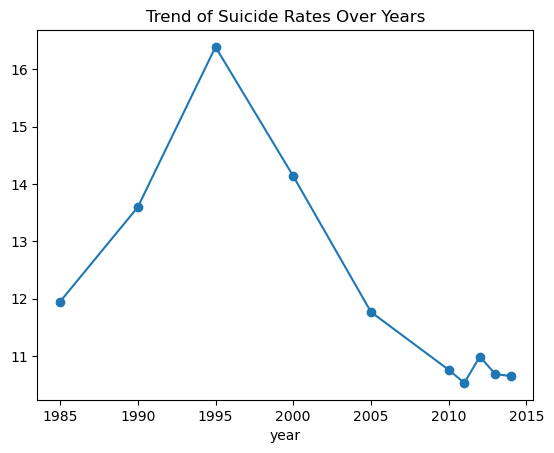

In [22]:
# Year Vs Suicide/100k pop
avg_suicide_rate_by_year = df.groupby('year')['suicides/100k pop'].mean()
avg_suicide_rate_by_year.plot(kind='line', title='Trend of Suicide Rates Over Years', marker='o')


From the above line graph we can a rise in suicide rate from 1985 to 1995 then a sharp decline to 2011 where it rose abit.
what factors influenced the sudden decrease from 1995 to 2011 and what caused the sudden rise again.

In [36]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation',
       'suicide_proportion'],
      dtype='object')


Average Suicide Rate by Age Group:
           age  suicides/100k pop
0  15-24 years           8.651736
1  25-34 years          11.467518
2  35-54 years          14.116133
3   5-14 years           0.628623
4  55-74 years          15.143006
5    75+ years          21.944598


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_46456\1646303975.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_analysis, x='suicides/100k pop', y='age', palette='viridis')


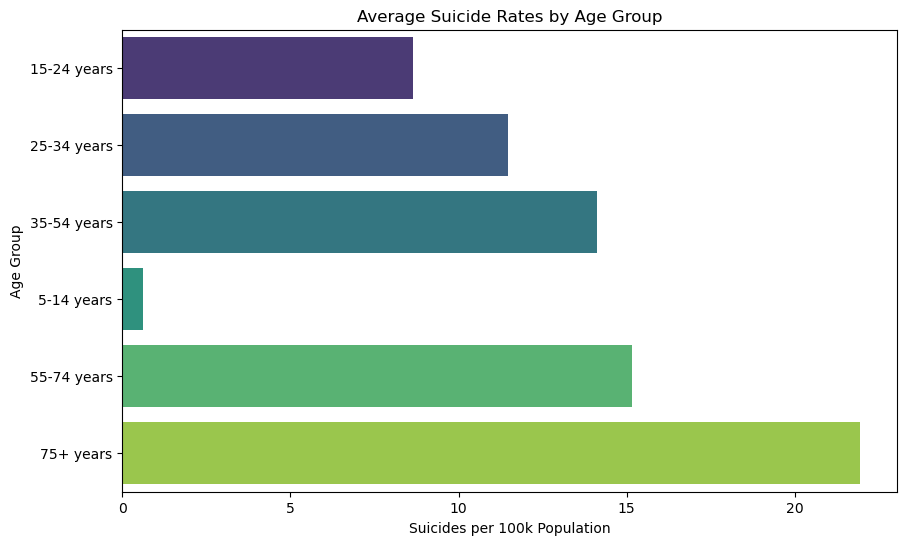

In [39]:
# Group data by age and calculate the average suicide rate
age_analysis = df.groupby('age')['suicides/100k pop'].mean().reset_index()
print("\nAverage Suicide Rate by Age Group:")
print(age_analysis)

# Plot suicide rates by age
plt.figure(figsize=(10, 6))
sns.barplot(data=age_analysis, x='suicides/100k pop', y='age', palette='viridis')
plt.title('Average Suicide Rates by Age Group')
plt.xlabel('Suicides per 100k Population')
plt.ylabel('Age Group')
plt.show()


Average Suicide Rate by Gender:
      sex  suicides/100k pop
0  female           4.937198
1    male          19.046674


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_46456\2418484271.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_analysis, x='sex', y='suicides/100k pop', palette='coolwarm')


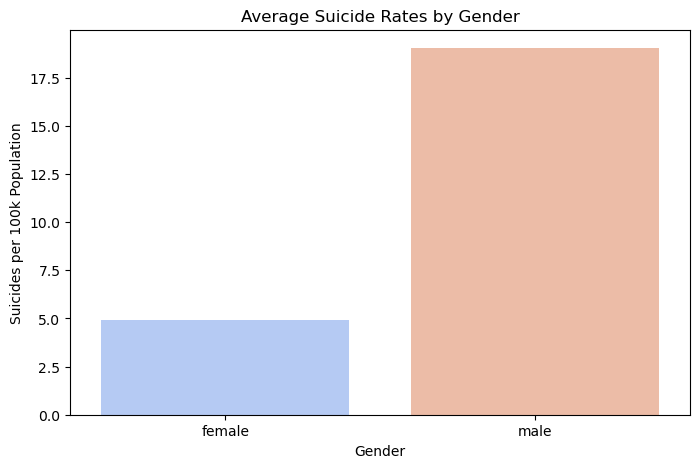

In [40]:
# --------- Objective 2: Gender Analysis ---------

# Group data by gender and calculate the average suicide rate
gender_analysis = df.groupby('sex')['suicides/100k pop'].mean().reset_index()
print("\nAverage Suicide Rate by Gender:")
print(gender_analysis)

# Plot suicide rates by gender
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_analysis, x='sex', y='suicides/100k pop', palette='coolwarm')
plt.title('Average Suicide Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Suicides per 100k Population')
plt.show()


Average Suicide Rate by Generation:
        generation  suicides/100k pop
0          Boomers          14.404119
1  G.I. Generation          24.555974
2     Generation X          11.044707
3     Generation Z           0.638924
4       Millenials           7.181961
5           Silent          17.619277


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_46456\633813854.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=generation_analysis, x='generation', y='suicides/100k pop', palette='mako')


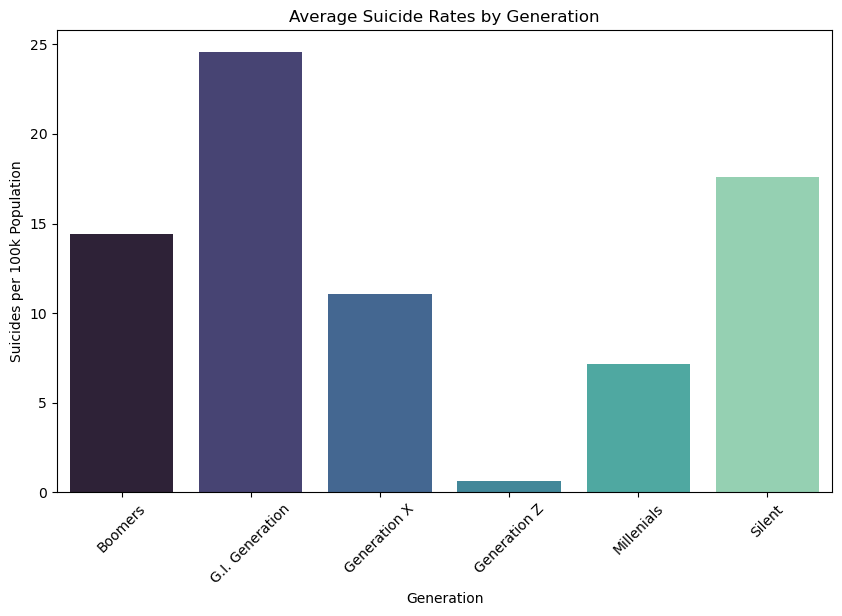

In [42]:
#------- Objective 3: Generation Insights ---------

# Group data by generation and calculate the average suicide rate
generation_analysis = df.groupby('generation')['suicides/100k pop'].mean().reset_index()
print("\nAverage Suicide Rate by Generation:")
print(generation_analysis)

# Plot suicide rates by generation
plt.figure(figsize=(10, 6))
sns.barplot(data=generation_analysis, x='generation', y='suicides/100k pop', palette='mako')
plt.title('Average Suicide Rates by Generation')
plt.xlabel('Generation')
plt.ylabel('Suicides per 100k Population')
plt.xticks(rotation=45)
plt.show()


The G.I Genration whose age is 75years+ are the leading generation with more suicide rate followed by the Silent generation whose age group is 55- 74years. 
It is concerning that the elderly are the ones the highest suicide rate.


Population vs Suicide Rates (Mean per Country):
                 country    population  suicides/100k pop
0                Albania  2.337301e+05           2.352292
1    Antigua and Barbuda  7.481083e+03           0.000000
2              Argentina  2.906959e+06          10.005083
3                Armenia  2.479998e+05           3.246458
4              Australia  1.634832e+06          12.277500
..                   ...           ...                ...
85  United Arab Emirates  5.050070e+05           1.615000
86        United Kingdom  4.765921e+06           7.355333
87         United States  2.246871e+07          13.860500
88               Uruguay  2.523808e+05          19.743611
89            Uzbekistan  2.113732e+06           6.666667

[90 rows x 3 columns]


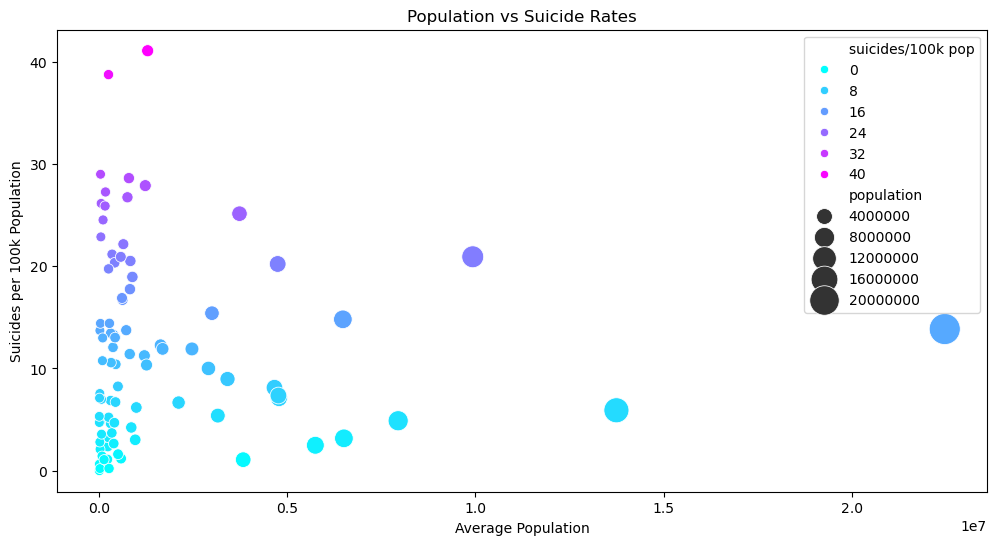

In [44]:
#------- Objective 4: Population-Based Risk ---------

# Analyze the relationship between population size and suicide rate
population_analysis = df.groupby('country')[['population', 'suicides/100k pop']].mean().reset_index()
print("\nPopulation vs Suicide Rates (Mean per Country):")
print(population_analysis)

# Scatter plot: population vs suicide rates
plt.figure(figsize=(12, 6))
sns.scatterplot(data=population_analysis, x='population', y='suicides/100k pop', hue='suicides/100k pop', size='population', sizes=(50, 500), palette='cool')
plt.title('Population vs Suicide Rates')
plt.xlabel('Average Population')
plt.ylabel('Suicides per 100k Population')
plt.show()



Average Suicide Rates by Age and Gender:
            age     sex  suicides/100k pop
0   15-24 years  female           4.261722
1   15-24 years    male          13.041750
2   25-34 years  female           4.339125
3   25-34 years    male          18.595911
4   35-54 years  female           5.718049
5   35-54 years    male          22.514218
6    5-14 years  female           0.483472
7    5-14 years    male           0.773773
8   55-74 years  female           6.560545
9   55-74 years    male          23.725466
10    75+ years  female           8.260273
11    75+ years    male          35.628924


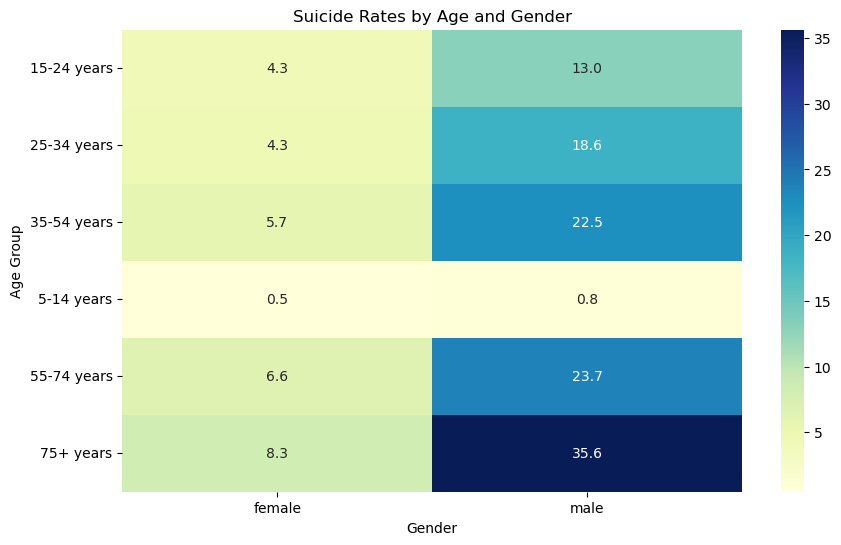

In [45]:
# --------- Cross-Age and Gender Analysis ---------

# Analyze suicide rates across age groups and gender
age_gender_analysis = df.groupby(['age', 'sex'])['suicides/100k pop'].mean().reset_index()
print("\nAverage Suicide Rates by Age and Gender:")
print(age_gender_analysis)

# Heatmap for suicide rates by age and gender
age_gender_pivot = age_gender_analysis.pivot(index='age', columns='sex', values='suicides/100k pop')
plt.figure(figsize=(10, 6))
sns.heatmap(age_gender_pivot, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Suicide Rates by Age and Gender')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.show()

From the above Gender , Age and Suicide rate heatmap the males have higher suicide rate compared to females.
The suicide rate increases with increase of age both in males and females.


Average Suicide Rates by Gender Over Years:
    year     sex  suicides/100k pop
0   1985  female           5.846757
1   1985    male          18.046081
2   1990  female           6.487067
3   1990    male          20.705033
4   1995  female           6.979550
5   1995    male          25.804233
6   2000  female           5.720833
7   2000    male          22.554408
8   2005  female           4.849167
9   2005    male          18.685702
10  2010  female           4.157798
11  2010    male          17.358254
12  2011  female           4.098230
13  2011    male          16.962058
14  2012  female           4.285470
15  2012    male          17.693248
16  2013  female           4.161061
17  2013    male          17.203680
18  2014  female           4.288422
19  2014    male          17.011778


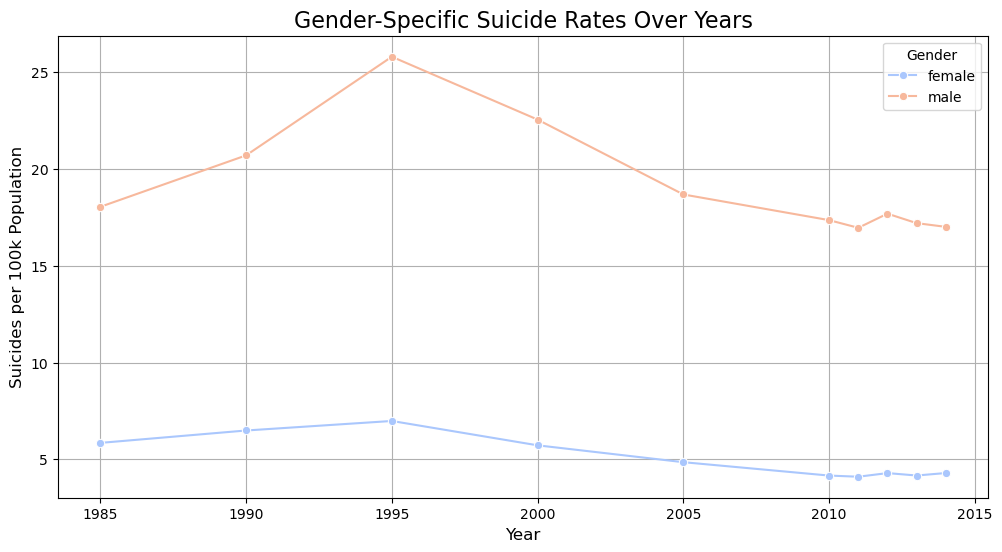

In [46]:


# --------- Gender Analysis of Suicide Rates Over Years ---------

# Group by year and gender, then calculate the average suicide rate per 100k population
gender_year_analysis = df.groupby(['year', 'sex'])['suicides/100k pop'].mean().reset_index()

# Print the results for reference
print("\nAverage Suicide Rates by Gender Over Years:")
print(gender_year_analysis)

# Plot the gender-specific suicide rates over years
plt.figure(figsize=(12, 6))
sns.lineplot(data=gender_year_analysis, x='year', y='suicides/100k pop', hue='sex', marker='o', palette='coolwarm')
plt.title('Gender-Specific Suicide Rates Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Suicides per 100k Population', fontsize=12)
plt.legend(title='Gender', fontsize=10)
plt.grid(True)
plt.show()



In the above trend analysis there is a sharp increase in male suicide rate over the year 1985 to 1995 then a drop unlike in females the rise between 1985 to 1995 minimal followed by a steady drop .


Overall Average Suicide Rate (Males): 19.20 per 100k population
Overall Average Suicide Rate (Females): 5.09 per 100k population

Year-wise Male-Female Suicide Rate Gap:
sex   Male-Female Gap
year                 
1985        12.199324
1990        14.217967
1995        18.824683
2000        16.833575
2005        13.836535
2010        13.200456
2011        12.863827
2012        13.407778
2013        13.042619
2014        12.723356


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_46456\2028791409.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_diff.index, y=gender_diff['Male-Female Gap'], palette='viridis')


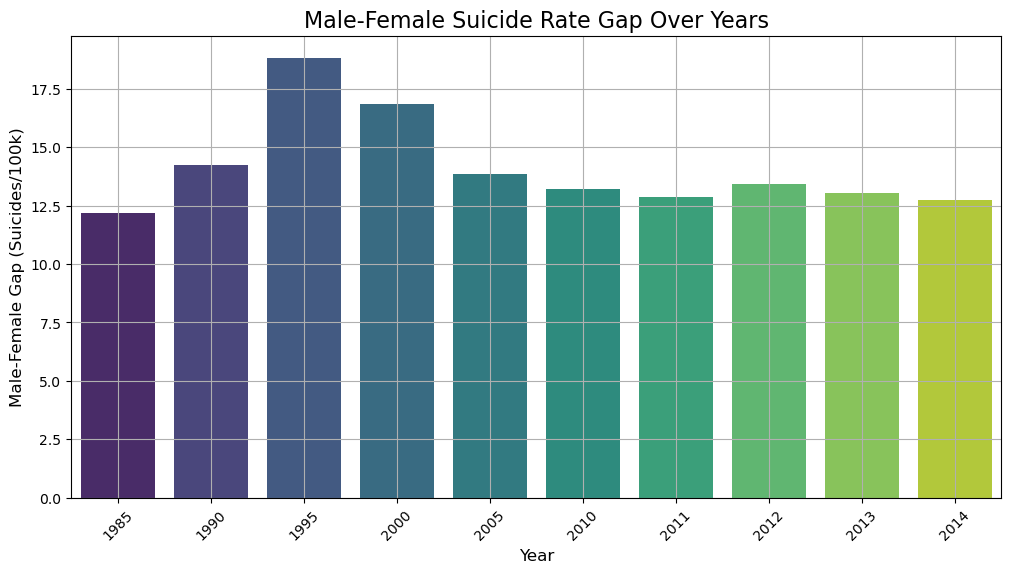

In [47]:
# --------- Gender Suicide Rate Trends ---------

# Calculate trends (e.g., average rate of change for each gender)
male_trend = gender_year_analysis[gender_year_analysis['sex'] == 'male']['suicides/100k pop'].mean()
female_trend = gender_year_analysis[gender_year_analysis['sex'] == 'female']['suicides/100k pop'].mean()

print(f"\nOverall Average Suicide Rate (Males): {male_trend:.2f} per 100k population")
print(f"Overall Average Suicide Rate (Females): {female_trend:.2f} per 100k population")

# Analyze Year-on-Year Difference
gender_diff = gender_year_analysis.pivot(index='year', columns='sex', values='suicides/100k pop')
gender_diff['Male-Female Gap'] = gender_diff['male'] - gender_diff['female']

# Print the gap between male and female suicide rates per year
print("\nYear-wise Male-Female Suicide Rate Gap:")
print(gender_diff[['Male-Female Gap']])

# Plot the male-female gap over years
plt.figure(figsize=(12, 6))
sns.barplot(x=gender_diff.index, y=gender_diff['Male-Female Gap'], palette='viridis')
plt.title('Male-Female Suicide Rate Gap Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Male-Female Gap (Suicides/100k)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



Average Suicide Rates by Generation Over Years:
    year       generation  suicides/100k pop
0   1985          Boomers          10.576081
1   1985  G.I. Generation          20.259932
2   1985     Generation X           4.549865
3   1985           Silent          11.482838
4   1990          Boomers          12.809700
5   1990  G.I. Generation          21.879800
6   1990     Generation X           5.258500
7   1990           Silent          14.490000
8   1995          Boomers          19.333016
9   1995  G.I. Generation          32.022302
10  1995     Generation X          12.922262
11  1995       Millenials           0.648175
12  1995           Silent          20.503333
13  2000          Boomers          16.820132
14  2000  G.I. Generation          26.071053
15  2000     Generation X          11.616678
16  2000       Millenials           0.539803
17  2000           Silent          18.161382
18  2005          Boomers          14.314868
19  2005     Generation X          11.541513
20  20

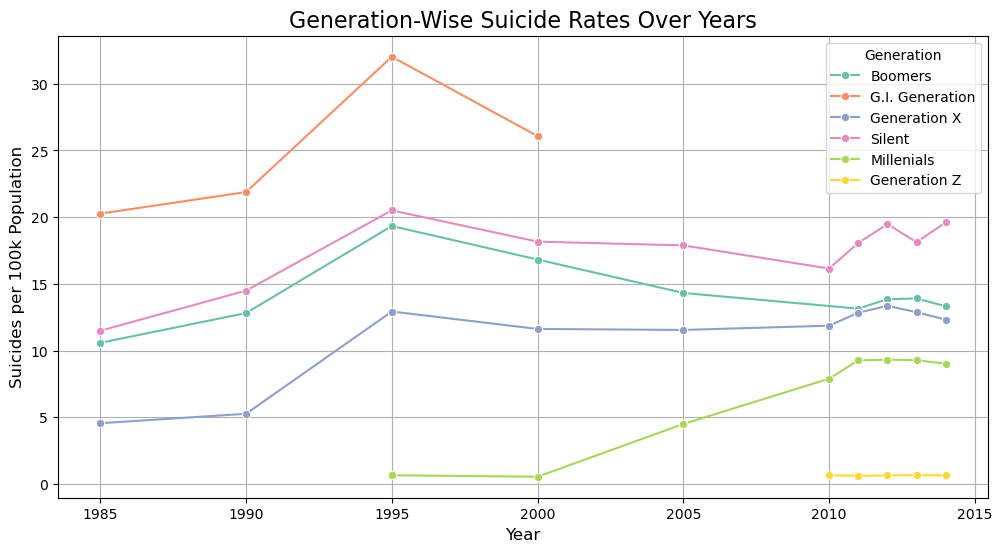

In [48]:

# --------- Generation-Wise Suicide Rate Trends ---------

# Group by year and generation, then calculate the average suicide rate
generation_year_analysis = df.groupby(['year', 'generation'])['suicides/100k pop'].mean().reset_index()

# Print the results for reference
print("\nAverage Suicide Rates by Generation Over Years:")
print(generation_year_analysis)

# Plot the generation-wise suicide rates over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=generation_year_analysis, x='year', y='suicides/100k pop', hue='generation', marker='o', palette='Set2')
plt.title('Generation-Wise Suicide Rates Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Suicides per 100k Population', fontsize=12)
plt.legend(title='Generation', fontsize=10)
plt.grid(True)
plt.show()




The G.I Generation have a drastic rise from 1990 to 1995 and their data ended in 2000 . 
A close watch and intervention should be taken for the millenial generation.
There should be more support to the Generation Z inorder for their graph not rise exponential in the coming years.



Overall Average Suicide Rates by Generation:
        generation  suicides/100k pop
1  G.I. Generation          24.555974
5           Silent          17.619277
0          Boomers          14.404119
2     Generation X          11.044707
4       Millenials           7.181961
3     Generation Z           0.638924


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_46456\452500941.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=generation_average, x='suicides/100k pop', y='generation', palette='coolwarm')


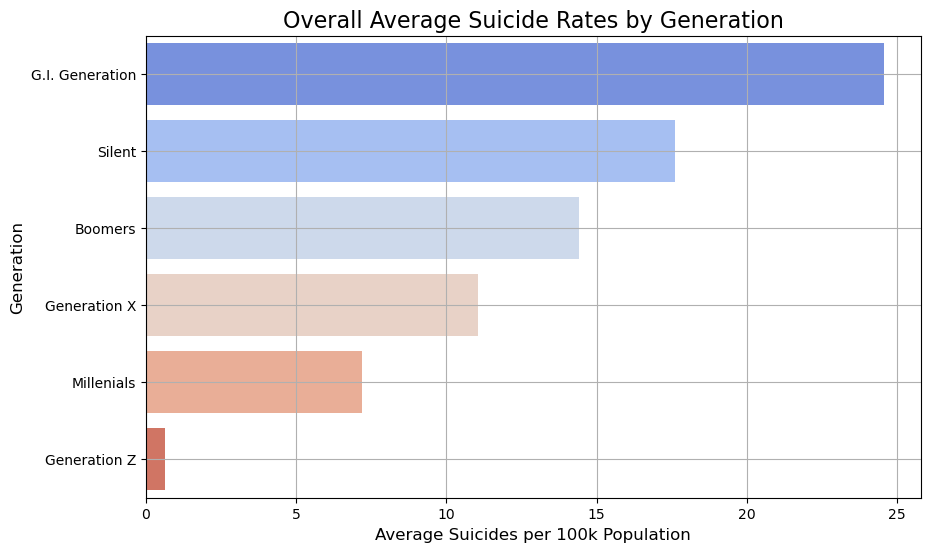

In [49]:
# --------- Generation-Wise Average Suicide Rates ---------

# Calculate the overall average suicide rate for each generation
generation_average = df.groupby('generation')['suicides/100k pop'].mean().reset_index()
generation_average = generation_average.sort_values(by='suicides/100k pop', ascending=False)
print("\nOverall Average Suicide Rates by Generation:")
print(generation_average)

# Plot average suicide rates for each generation
plt.figure(figsize=(10, 6))
sns.barplot(data=generation_average, x='suicides/100k pop', y='generation', palette='coolwarm')
plt.title('Overall Average Suicide Rates by Generation', fontsize=16)
plt.xlabel('Average Suicides per 100k Population', fontsize=12)
plt.ylabel('Generation', fontsize=12)
plt.grid(True)
plt.show()


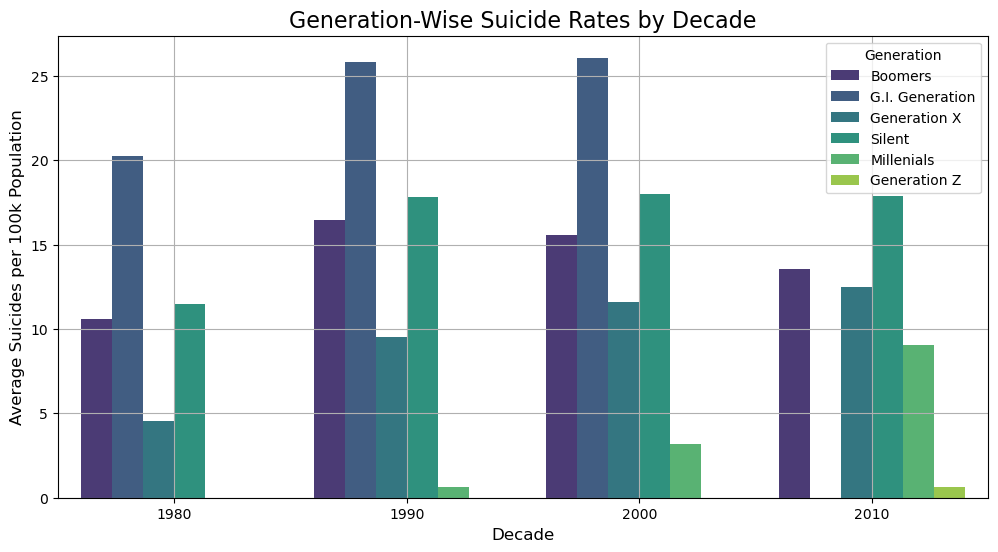

In [50]:
# --------- Additional Insights: Generation Comparison Over Decades ---------

# Filter the dataset to specific decades (e.g., 1980s, 1990s, 2000s, etc.)
df['decade'] = (df['year'] // 10) * 10  # Group years into decades
decade_generation_analysis = df.groupby(['decade', 'generation'])['suicides/100k pop'].mean().reset_index()

# Plot suicide rates by generation for each decade
plt.figure(figsize=(12, 6))
sns.barplot(data=decade_generation_analysis, x='decade', y='suicides/100k pop', hue='generation', palette='viridis')
plt.title('Generation-Wise Suicide Rates by Decade', fontsize=16)
plt.xlabel('Decade', fontsize=12)
plt.ylabel('Average Suicides per 100k Population', fontsize=12)
plt.legend(title='Generation', fontsize=10)
plt.grid(True)
plt.show()